In [ ]:
import pandas as pd
from skimpy import skim
import numpy as np
import random
import random
from plotnine import ggplot, aes, theme_bw, theme_minimal, theme_seaborn,geom_boxplot,geom_point,geom_histogram, geom_density, facet_wrap, facet_grid


In [ ]:

num_stores = 10  # Increase number of grocery stores
num_products = 3000  # Increase number of products
num_weeks = 52  # Full yetear data
random.seed(10)
print(random.random()) 

#lojas
cities = ["São Paulo", "Rio de Janeiro",
          "Belo Horizonte", "Fortaleza",
          "Curitiba", "Salvador",
          "Brasília", "Manaus", 
           "Recife", "Porto Alegre"]

states = ["SP", "RJ", "MG", "CE", "PR", "BA", "DF", "AM", "PE", "RS"]
store_ids = list(range(1, num_stores + 1))

store_data = pd.DataFrame({
    "store_id": store_ids,
    "city": np.random.choice(cities, num_stores),
    "state": np.random.choice(states, num_stores),
    "store_type": np.random.choice(["Supermarket", "Hypermarket", "Neighborhood Store"], num_stores)
})

#prod
products = [f"Product_{i}" for i in range(1, num_products + 1)]
categories = ["Grains", "Dairy", "Meat", "Beverage", "Hygiene", "Cleaning", "Frozen", "Snacks", "Baby"]

product_data = pd.DataFrame({
    "product_id": list(range(1, num_products + 1)),
    "product_name": products,
    "category": np.random.choice(categories, num_products)
})
#vendas
sales_data = []
for week in range(1, num_weeks + 1):
    for store_id in store_ids:
        for product_id in range(1, num_products + 1):
            price = round(random.uniform(2, 50), 2)
            quantity_sold = random.randint(5, 1000)
            promo = np.random.choice([0, 1], p=[0.7, 0.3])
            holiday_week = np.random.choice([0, 1], p=[0.85, 0.15])
            sales_data.append([store_id, product_id, week, price, quantity_sold, promo, holiday_week])

sales_df = pd.DataFrame(sales_data, columns=["store_id", "product_id", "week", "price_per_unit", "quantity_sold", "promo", "holiday_week"])

# Merge data
dataset = sales_df.merge(store_data, on="store_id").merge(product_data, on="product_id")

In [ ]:
import numpy as np
import pandas as pd
import random

# Definir parâmetros
total_stores = 10
total_products = 3000
total_weeks = 52
random.seed(10)

# Definir cidades e estados
cities = ["São Paulo", "Rio de Janeiro", "Belo Horizonte", "Fortaleza", "Curitiba", "Salvador", "Brasília", "Manaus", "Recife", "Porto Alegre"]
states = ["SP", "RJ", "MG", "CE", "PR", "BA", "DF", "AM", "PE", "RS"]
store_types = ["Supermarket", "Hypermarket", "Neighborhood Store"]

# Criar dados das lojas
store_data = pd.DataFrame({
    "store_id": range(1, total_stores + 1),
    "city": np.random.choice(cities, total_stores),
    "state": np.random.choice(states, total_stores),
    "store_type": np.random.choice(store_types, total_stores)
})

# Criar dados dos produtos
categories = ["Grains", "Dairy", "Meat", "Beverage", "Hygiene", "Cleaning", "Frozen", "Snacks", "Baby"]
product_data = pd.DataFrame({
    "product_id": range(1, total_products + 1),
    "product_name": [f"Product_{i}" for i in range(1, total_products + 1)],
    "category": np.random.choice(categories, total_products)
})

# Criar dados de vendas
sales_data = []
for week in range(1, total_weeks + 1):
    for _, store in store_data.iterrows():city
        for _, product in product_data.iterrows():
            base_price = round(random.uniform(2, 50), 2)
            
            # Fatores de variação de preço por tipo de loja
            if store["store_type"] == "Hypermarket":
                base_price *= random.uniform(0.9, 1.0)
            elif store["store_type"] == "Neighborhood Store":
                base_price *= random.uniform(1.05, 1.2)
            
            # Definir quantidade vendida com relação linear ao preço dentro de cada loja/cidade
            store_factor = random.uniform(1.1, 1.5) - (base_price / 100)
            state_factor = random.uniform(0.8, 1.2) - (base_price / 150)
            
            # Quantidade base ajustada pela localização
            quantity_sold = max(5, int(random.gauss(500 * store_factor * state_factor, 50)))
            
            # Aplicar promoções e feriados
            promo = np.random.choice([0, 1], p=[0.7, 0.3])
            holiday_week = np.random.choice([0, 1], p=[0.85, 0.15])
            if promo:
                quantity_sold = int(quantity_sold * random.uniform(1.3, 1.7))
            if holiday_week:
                quantity_sold = int(quantity_sold * random.uniform(1.1, 1.5))
            
            sales_data.append([store["store_id"], product["product_id"], week, base_price, quantity_sold, promo, holiday_week])

# Criar DataFrame de vendas
sales_df = pd.DataFrame(sales_data, columns=["store_id", "product_id", "week", "price_per_unit", "quantity_sold", "promo", "holiday_week"])

# Mesclar dados
dataset = sales_df.merge(store_data, on="store_id").merge(product_data, on="product_id")

# Exibir uma amostra
dataset.head()


,store_id,product_id,week,price_per_unit,quantity_sold,promo,holiday_week,city,state,store_type,product_name,category
0,1,1,1,32.794831,369,0,0,Brasília,RS,Neighborhood Store,Product_1,Cleaning
1,1,2,1,35.840529,338,1,0,Brasília,RS,Neighborhood Store,Product_2,Grains
2,1,3,1,57.263345,168,0,0,Brasília,RS,Neighborhood Store,Product_3,Dairy
3,1,4,1,17.970930,676,0,1,Brasília,RS,Neighborhood Store,Product_4,Grains
4,1,5,1,9.764172,849,0,1,Brasília,RS,Neighborhood Store,Product_5,Cleaning


In [25]:
skim(dataset)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ Dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 1560000 │ │ int64       │ 6     │                                                         │
│ │ Number of columns │ 12      │ │ string      │ 5     │                                                         │
│ └───────────────────┴─────────┘ │ float64     │ 1     │                                                         │
│                                 └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column            ┃ NA  ┃ NA %  ┃ mean     ┃ sd      ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ store_id          │   0 │     0 │      5.5 │   2.872 │      1 │      3 │    5.5 │      8 │     10 │ █▄█▄██ │  │
│ │ product_id        │   0 │     0 │     1500 │     866 │      1 │  750.8 │   1500 │   2250 │   3000 │ ██████ │  │
│ │ week              │   0 │     0 │     26.5 │   15.01 │      1 │  13.75 │   26.5 │  39.25 │     52 │ █▇█▇██ │  │
│ │ price_per_unit    │   0 │     0 │    27.08 │   14.68 │  1.805 │  14.47 │  26.87 │  39.28 │  59.98 │ ████▇▂ │  │
│ │ quantity_sold     │   0 │     0 │    514.1 │   214.1 │      5 │    361 │    482 │    629 │   2185 │  ▄█▂   │  │
│ │ promo             │   0 │     0 │   0.2997 │  0.4581 │      0 │      0 │      0 │      1 │      1 │ █    ▃ │  │
│ │ holiday_week      │   0 │     0 │   0.1495 │  0.3566 │      0 │      0 │      0 │      0 │      1 │ █    ▁ │  │
│ └───────────────────┴─────┴───────┴──────────┴─────────┴────────┴────────┴────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ city      │  0 │    0 │ Manaus    │ Rio de    │ Brasília  │ São Paulo │         9 │       1.4 │    2184000 │  │
│ │           │    │      │           │ Janeiro   │           │           │           │           │            │  │
│ │ state     │  0 │    0 │ RS        │ RS        │ AM        │ SP        │         2 │         1 │    1560000 │  │
│ │ store_typ │  0 │    0 │ Hypermark │ Neighborh │ Hypermark │ Supermark │      14.5 │       1.5 │    2340000 │  │
│ │ e         │    │      │ et        │ ood Store │ et        │ et        │           │           │            │  │
│ │ product_n │  0 │    0 │ Product_1 │ Product_1 │ Product_1 │ Product_9 │      11.6 │         1 │    1560000 │  │
│ │ ame       │    │      │           │ 000       │           │ 99        │           │           │            │  │
│ │ category  │  0 │    0 │ Baby      │ Cleaning  │ Baby      │ Snacks    │      6.03 │         1 │    1560000 │  │
│ └───────────┴────┴──────┴───────────┴───────────┴─────

In [ ]:
import statsmodels.api as sm


In [78]:
# firstly plot the data witout considering any groping to demonstrates how ecologic fallacy works for our dataset
##abordagem top-down
import statsmodels as sm
import statsmodels.formula.api as smf
model1 = smf.mixedlm("quantity_sold ~ price_per_unit+week+promo+holiday_week + 1|week",
           dataset ,
           groups=dataset['city'],
           re_formula="~price_per_unit")

fit1 = model1.fit(method = "lbfgs")


/home/jailson/Área de trabalho/CursosByEU/CursoLMM/.venv/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.


In [79]:
print(fit1.summary())

                    Mixed Linear Model Regression Results
Model:                   MixedLM       Dependent Variable:      quantity_sold
No. Observations:        1560000       Method:                  REML         
No. Groups:              7             Scale:                   15281.4843   
Min. group size:         156000        Log-Likelihood:          -9728471.4645
Max. group size:         468000        Converged:               Yes          
Mean group size:         222857.1                                            
-----------------------------------------------------------------------------
                             Coef.   Std.Err.    z     P>|z|  [0.025   0.975]
-----------------------------------------------------------------------------
Intercept                    668.261   46.724   14.302 0.000  576.683 759.839
price_per_unit                -8.983   46.723   -0.192 0.848 -100.559  82.593
week                           0.117    0.198    0.587 0.557   -0.272   0.505
promo 

In [ ]:
df = dataset[dataset['city'] == 'Brasília']
df

,store_id,product_id,week,price_per_unit,quantity_sold,promo,holiday_week,city,state,store_type,product_name,category
0,1,1,1,32.794831,369,0,0,Brasília,RS,Neighborhood Store,Product_1,Cleaning
1,1,2,1,35.840529,338,1,0,Brasília,RS,Neighborhood Store,Product_2,Grains
2,1,3,1,57.263345,168,0,0,Brasília,RS,Neighborhood Store,Product_3,Dairy
3,1,4,1,17.970930,676,0,1,Brasília,RS,Neighborhood Store,Product_4,Grains
4,1,5,1,9.764172,849,0,1,Brasília,RS,Neighborhood Store,Product_5,Cleaning
...,...,...,...,...,...,...,...,...,...,...,...,...
1547995,6,2996,52,35.291590,292,0,0,Brasília,DF,Hypermarket,Product_2996,Dairy
1547996,6,2997,52,14.391688,782,1,0,Brasília,DF,Hypermarket,Product_2997,Dairy
1547997,6,2998,52,15.790313,968,1,0,Brasília,DF,Hypermarket,Product_2998,Meat
1547998,6,2999,52,32.327190,659,1,0,Brasília,DF,Hypermarket,Product_2999,Beverage


In [50]:
df[df['store_id']==1]

,store_id,product_id,week,price_per_unit,quantity_sold,promo,holiday_week,city,state,store_type,product_name,category
0,1,1,1,32.794831,369,0,0,Brasília,RS,Neighborhood Store,Product_1,Cleaning
1,1,2,1,35.840529,338,1,0,Brasília,RS,Neighborhood Store,Product_2,Grains
2,1,3,1,57.263345,168,0,0,Brasília,RS,Neighborhood Store,Product_3,Dairy
3,1,4,1,17.970930,676,0,1,Brasília,RS,Neighborhood Store,Product_4,Grains
4,1,5,1,9.764172,849,0,1,Brasília,RS,Neighborhood Store,Product_5,Cleaning
...,...,...,...,...,...,...,...,...,...,...,...,...
1532995,1,2996,52,51.309910,469,1,0,Brasília,RS,Neighborhood Store,Product_2996,Dairy
1532996,1,2997,52,31.920844,471,0,0,Brasília,RS,Neighborhood Store,Product_2997,Dairy
1532997,1,2998,52,36.173612,551,1,0,Brasília,RS,Neighborhood Store,Product_2998,Meat
1532998,1,2999,52,58.854157,250,0,1,Brasília,RS,Neighborhood Store,Product_2999,Beverage


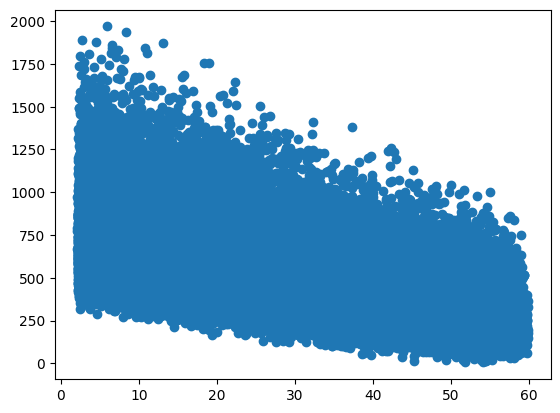

In [51]:
from matplotlib import pyplot
from matplotlib.pyplot import scatter

loja1 = df[df['store_id']=="1"]
pyplot.scatter(df[df['store_id']==1]["price_per_unit"],df[df['store_id']==1]["quantity_sold"])